In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff


In [5]:
# Load the EEG dataset
data, meta = arff.loadarff(r"C:\Users\Arshiya A\Downloads\eeg+eye+state\EEG Eye State.arff")
# Convert to pandas dataframe for easier manipulation
df = pd.DataFrame(data)

# Show the first few rows to check the dataset
print(df.head())


       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4 eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85         b'0'  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10         b'0'  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23         b'0'  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41         b'0'  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46         b'0'  


In [6]:
# Clean the dataset: Convert 'eyeDetection' from byte format to string
df['eyeDetection'] = df['eyeDetection'].apply(lambda x: x.decode('utf-8'))

# Check for missing values
print(df.isnull().sum())  # This will show if there are any missing values in each column


AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64


In [7]:
# Convert eyeDetection to binary (0 or 1)
df['eyeDetection'] = df['eyeDetection'].astype(int)

# Check the data types of columns
print(df.dtypes)


AF3             float64
F7              float64
F3              float64
FC5             float64
T7              float64
P7              float64
O1              float64
O2              float64
P8              float64
T8              float64
FC6             float64
F4              float64
F8              float64
AF4             float64
eyeDetection      int64
dtype: object


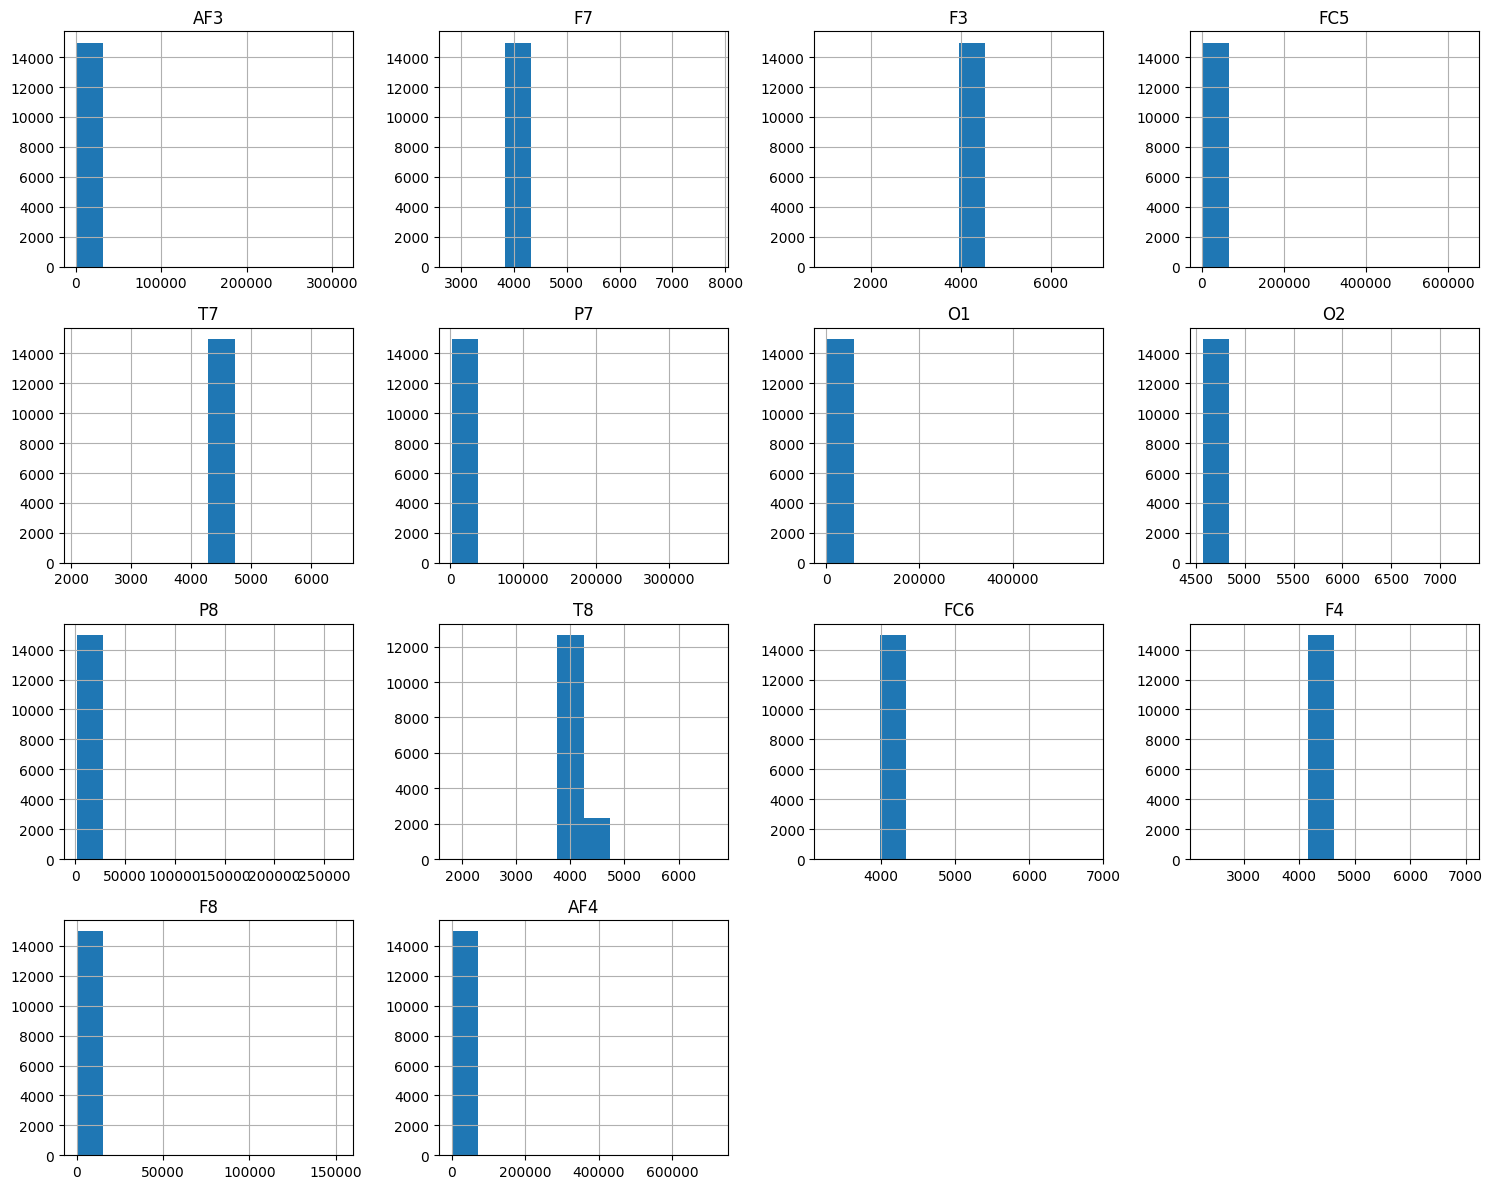

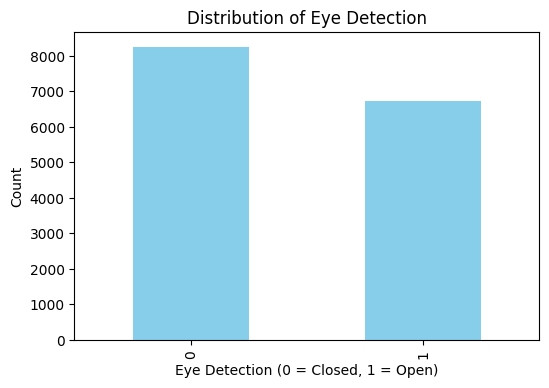

In [8]:
import matplotlib.pyplot as plt

# Plot histograms for all EEG signals
df.drop(columns='eyeDetection').hist(figsize=(15, 12))
plt.tight_layout()
plt.show()

# Plot the distribution of eyeDetection
plt.figure(figsize=(6, 4))
df['eyeDetection'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Eye Detection")
plt.xlabel("Eye Detection (0 = Closed, 1 = Open)")
plt.ylabel("Count")
plt.show()


          AF3        F7        F3       FC5        T7        P7        O1  \
AF3  1.000000  0.261146  0.474569  0.012173  0.278938  0.007958  0.006630   
F7   0.261146  1.000000  0.583317 -0.208922 -0.250816 -0.042288 -0.210591   
F3   0.474569  0.583317  1.000000 -0.330162 -0.272186 -0.596566 -0.335514   
FC5  0.012173 -0.208922 -0.330162  1.000000  0.504616  0.009049  0.999961   
T7   0.278938 -0.250816 -0.272186  0.504616  1.000000  0.409277  0.504231   
P7   0.007958 -0.042288 -0.596566  0.009049  0.409277  1.000000  0.013707   
O1   0.006630 -0.210591 -0.335514  0.999961  0.504231  0.013707  1.000000   
O2   0.040539  0.517816  0.221270  0.130482 -0.030063  0.208167  0.133434   
P8   0.999607  0.264922  0.486506  0.013228  0.264913 -0.012528  0.007638   
T8  -0.070801  0.489010  0.191273 -0.519498 -0.225508  0.420539 -0.515699   
FC6  0.572997  0.317418  0.517950  0.420311  0.336173 -0.196873  0.417041   
F4  -0.394334  0.275977  0.116761  0.515388 -0.095902 -0.229149  0.517621   

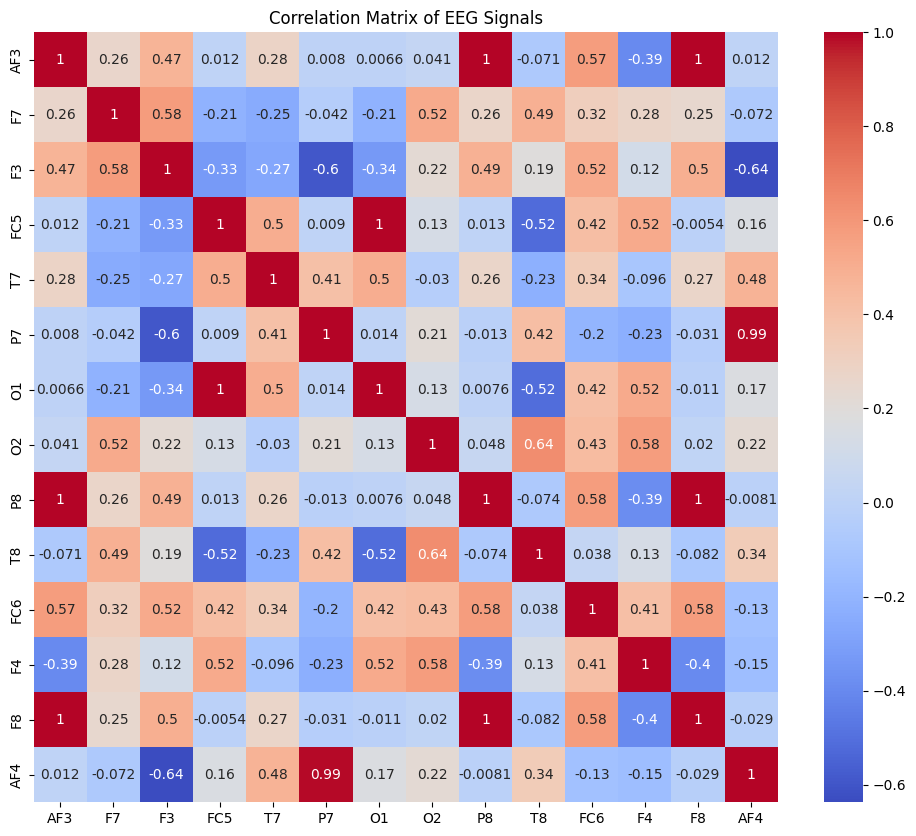

In [9]:
# Check correlation between the EEG signals and eyeDetection
correlation_matrix = df.drop(columns='eyeDetection').corr()
print(correlation_matrix)

# Visualize the correlation matrix (if needed)
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of EEG Signals")
plt.show()


In [10]:
# Define features and target variable
X = df.drop(columns='eyeDetection')  # EEG features
y = df['eyeDetection']  # Target variable (eye detection)

# Standardize/Normalize the features (important for machine learning models)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the transformed data
print(X_scaled[:5])  # Check the first 5 rows after scaling


[[ 2.93429184e-03 -1.17042221e-02  5.67398476e-01 -3.20850974e-03
   2.45235984e-01 -1.97875130e-02 -2.92997712e-03  8.52567781e-01
   1.50883944e-03  1.87749524e-01  2.33509739e-01  3.07447210e-02
   1.71266714e-02 -3.83389807e-03]
 [ 1.08436392e-03 -1.12052199e-01  6.71390301e-01 -3.11073799e-03
   8.89307324e-03 -1.96097165e-02 -2.81695264e-03  7.82240513e-01
  -3.77122586e-03 -1.22108922e-01  1.38497787e-01  6.19180366e-03
   1.45776981e-02 -5.48894028e-03]
 [ 2.31631158e-03 -6.74289120e-02  7.05829153e-01 -1.63649333e-03
  -1.38785262e-01 -2.06628188e-02 -2.92997712e-03  4.84885898e-01
  -5.21294582e-03 -2.43529280e-01  1.11502748e-01  6.78148119e-02
   1.11845842e-02 -4.61813346e-03]
 [ 2.72963604e-03  4.40204678e-02  7.29013477e-01 -1.73426508e-03
   5.32253611e-02 -2.10149927e-02 -2.81695264e-03  5.02297018e-01
  -6.49059586e-04  1.06802619e-01  2.20012219e-01  2.03578002e-01
   1.41556278e-02 -3.39934339e-03]
 [ 1.69833132e-03  4.40204678e-02  6.36726359e-01 -2.61996213e-03
  

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.571762349799733
Confusion Matrix:
 [[1252  334]
 [ 949  461]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.79      0.66      1586
           1       0.58      0.33      0.42      1410

    accuracy                           0.57      2996
   macro avg       0.57      0.56      0.54      2996
weighted avg       0.57      0.57      0.55      2996



In [20]:
import joblib
joblib.dump(scaler, 'scaler.pkl')
# Save the model
joblib.dump(model, 'eye_detection_model.pkl')

# Load the model later
loaded_model = joblib.load('eye_detection_model.pkl')


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict using the trained model
y_pred = model.predict(X_scaled)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y, y_pred))  # This will give you precision, recall, F1-score, etc.

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.78      0.68      8257
           1       0.57      0.35      0.43      6723

    accuracy                           0.59     14980
   macro avg       0.58      0.57      0.56     14980
weighted avg       0.58      0.59      0.57     14980

Confusion Matrix:
[[6474 1783]
 [4371 2352]]


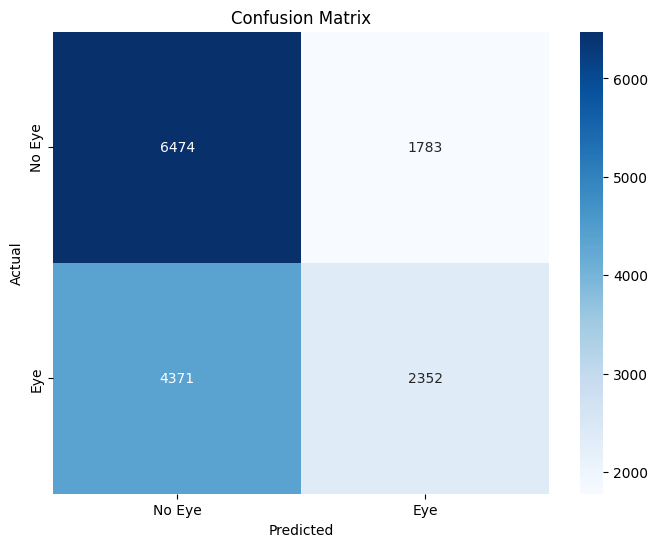

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix heatmap
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Eye', 'Eye'], yticklabels=['No Eye', 'Eye'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [16]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop(columns='eyeDetection')  # EEG features
y = df['eyeDetection']  # Target variable (eye detection)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize/Normalize the features (important for many models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model (e.g., Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Model Accuracy: {model.score(X_test_scaled, y_test)}')

# Save the trained model to a file
joblib.dump(model, 'eye_detection_model.pkl')




Model Accuracy: 0.9232309746328438


['eye_detection_model.pkl']

In [19]:
import joblib
joblib.dump(model, 'eye_detection_model.pkl')  # Save the trained model


['eye_detection_model.pkl']

In [18]:
import os
print(os.listdir())  # List all files in the current directory


['.anaconda', '.android', '.cache', '.conda', '.condarc', '.config', '.continuum', '.eclipse', '.emulator_console_auth_token', '.gradle', '.ipynb_checkpoints', '.ipython', '.jdks', '.jupyter', '.keras', '.matplotlib', '.node_repl_history', '.npmrc', '.p2', '.skiko', '.virtual_documents', '.vscode', '.yarnrc', '1NPDPRO5.DOC', 'accident-classification.ipynb', 'anaconda3', 'AndroidStudioProjects', 'AppData', 'AppData.lnk', 'Application Data', 'arshi-portfolio', 'Arshiya DS.ipynb', 'arshiya-portfolio', 'BPM Boxplot.jpg', 'catboost_info', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'DS Lab 2.ipynb', 'DS SEM PROJECT.ipynb', 'eclipse', 'eclipse-workspace', 'EEG1.ipynb', 'EEG_Eye_Detection_App', 'eye_detection_model.pkl', 'Favorites', 'home-rental-app', 'IdeaProjects', 'Linear regression dsMannual.ipynb', 'Links', 'Local Settings', 'Main.java', 'Microsoft', 'model.json', 'model_weights.keras', 'Music', 'music .ipynb', 'MusicGenreClassifier.ipynb', 'music_dataset.csv', 'Music_ge